# Identification

Complete the cell below and run!

In [1]:
print('Full name: ' + ' Mohammad Nourbakhsh Marvast')
print('STD ID: ' + '401200482')

Full name:  Mohammad Nourbakhsh Marvast
STD ID: 401200482


# Import Necessary Packages

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# ========================================
from matplotlib.animation import FuncAnimation, PillowWriter
from IPython import display
# ========================================

# Question 1

## Introduction

<div> <font face = "Tahoma" size = 4> <p style = "text-indent:25px; line-height:1.3;">
In the slides, you have been introduced to neurons and their encoding behavior of sensory input. You have learned about receptive fields and that each neuron reponds best to a certain amount in the sensory input's parameter.</p>
<p>In the most simple case, the neuron's firing rate based on the input's parameter can be assumed to be a Gaussian distribution with its mean at the neuron's optimum firing rate. This fact can be observed in the following picture.</p>
</font>
</div>    </font> <br>
</div>

![Receptive_Fields.png](attachment:306fa049-ec7e-40aa-b9e5-456acf1071af.png)

## Briefing

<div> <font face = "Tahoma" size = 4> <p style = "text-indent:25px; line-height:1.3;">
In this question you are supposed to create a sinwave and feed it to a spiking LIF neuron as the input. The neuron's membrane potential follows the differential equation : </p>
</font>
</div>

<font face = "Tahoma" size = 4>
$$
\begin{gather}
\tau_m\;\frac{dv}{dt} = v_{rest} - v + input \\
\end{gather}
$$
</font>
<font face = "Tahoma" size = 4>
    The membrane potential is constantly compared with a <b>threshold</b>. If the value exceeds the threshold, the neuron generates a spike and resets to value $$v_{rest}$$.
</font>
</div>

## Implementation (15 Points)

<font face = "Tahoma" size = 4>
Since spike times are needed later for the plots, you'd better solve the equation iteratively using Euler method rather than using <b>ode45</b>.<br><br>
Complete the following block in order to simulate the neuron and generate spikes!
</font>

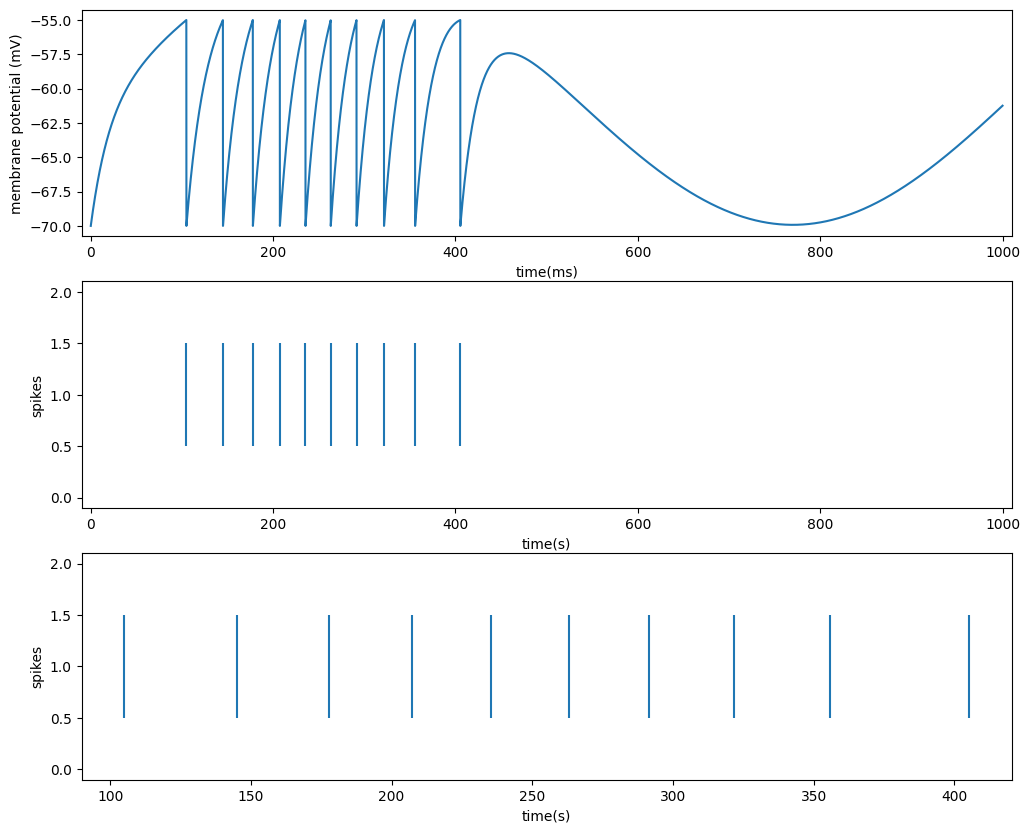

In [3]:
# Parameters for the Leaky Integrate-and-Fire (LIF) neuron model
tau_m = 20  # Membrane time constant (ms)
v_rest = -70  # Resting membrane potential (mV)
v_threshold = -55 # Spike threshold (mV)

# Simulation time
dt = 0.1  # Time step (ms)
t_sim = 1000  # Total simulation time (ms)
num_steps = int(t_sim / dt)

# Simulated sensory input signal
frequency = 1
input_signal = np.sin(2 * np.pi * frequency * np.arange(0, t_sim, dt) / 1000) * 10 + 10

# Initialize neuron variables
voltage = []  # Membrane potential
spike_times = []  # List to store spike times

# Simulate the encoding process
# =======================================================

voltage.append(v_rest)
v_spike = np.zeros(num_steps)

for i in range(1,num_steps):
  dv = (v_rest - voltage[i-1] + input_signal[i-1])/tau_m
  voltage.append(voltage[i-1] + dt * dv)

  if voltage[i] >= v_threshold:
    spike_times.append(i * dt)
    v_spike[i] = v_rest - voltage[i]
    voltage[i] = v_rest


# =======================================================

# Plot the membrane potential and spike times
# =======================================================

fig, ax = plt.subplots(3, 1, figsize=(12,10))
time = np.linspace(0, t_sim, num_steps)
ax[0].plot(time, voltage)
ax[0].set_ylabel('membrane potential (mV)')
ax[0].set_xlabel('time(ms)')
ax[0].set_xlim((-10,t_sim+10))
#ax[0].set_ylim((0,2))

ax[1].eventplot(spike_times)

ax[1].set_ylabel('spikes')
ax[1].set_xlabel('time(s)')
ax[1].set_xlim((-10,t_sim+10))
#ax[1].set_ylim((0,1))
#plt.setp(ax[:2], xlim=((-10,t_sim+10)))

ax[2].eventplot(spike_times)
ax[2].set_ylabel('spikes')
ax[2].set_xlabel('time(s)')
plt.show()
# =======================================================

## A Question! (10 Points)

<font face = "Tahoma" size = 4>
<b>Manipulate the input frequency a little bit. Can you reach a point where you observe maximum number of spikes?</b>
</font>

<font face = "Tahoma" size = 4>
ans: By observation, between freq = 0.3 and freq =  0.4 we have 23 spikes! that is a local maximum spikes around freq= 1!
</font>

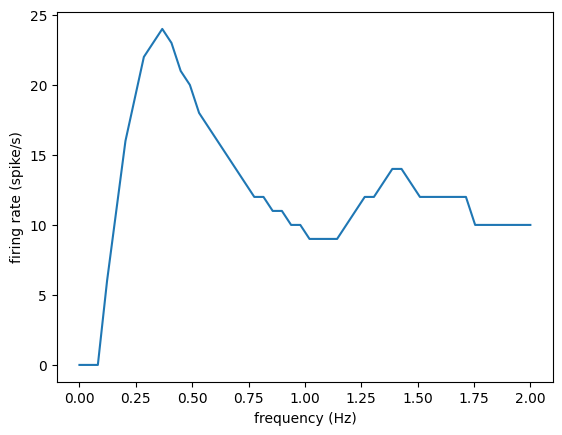

In [4]:
input_frequencies = np.linspace(0, 2, 50)  # From 1 Hz to 100 Hz
firing_rates = []

for frequency in input_frequencies:
    # Simulated sensory input signal (sine wave with varying frequency)
    input_signal = np.sin(2 * np.pi * frequency * np.arange(0, t_sim, dt) / 1000) * 10 + 10

    # Initialize neuron variables
    voltage = []
    spike_times = []  # List to store spike times

    # Simulate the encoding process
    # =======================================================
    voltage.append(v_rest)

    for i in range(1,num_steps):
      dv = (v_rest - voltage[i-1] + input_signal[i-1])/tau_m
      voltage.append(voltage[i-1] + dt * dv)

      if voltage[i] >= v_threshold:
        spike_times.append(i * dt)
        voltage[i] = v_rest
    # =======================================================

    # Calculate the firing rate (spikes per second)
    # =======================================================
    firing_rates.append(len(spike_times))
    # =======================================================

# Plot firing rate vs. input frequency
# =======================================================

plt.plot(input_frequencies, firing_rates)
plt.xlabel('frequency (Hz)')
plt.ylabel('firing rate (spike/s)')
#plt.xlim((0,2))
plt.show()

array([<Axes: xlabel='time(ms)', ylabel='membrane potential (mV)'>,
       <Axes: xlabel='time(s)', ylabel='spikes'>], dtype=object)

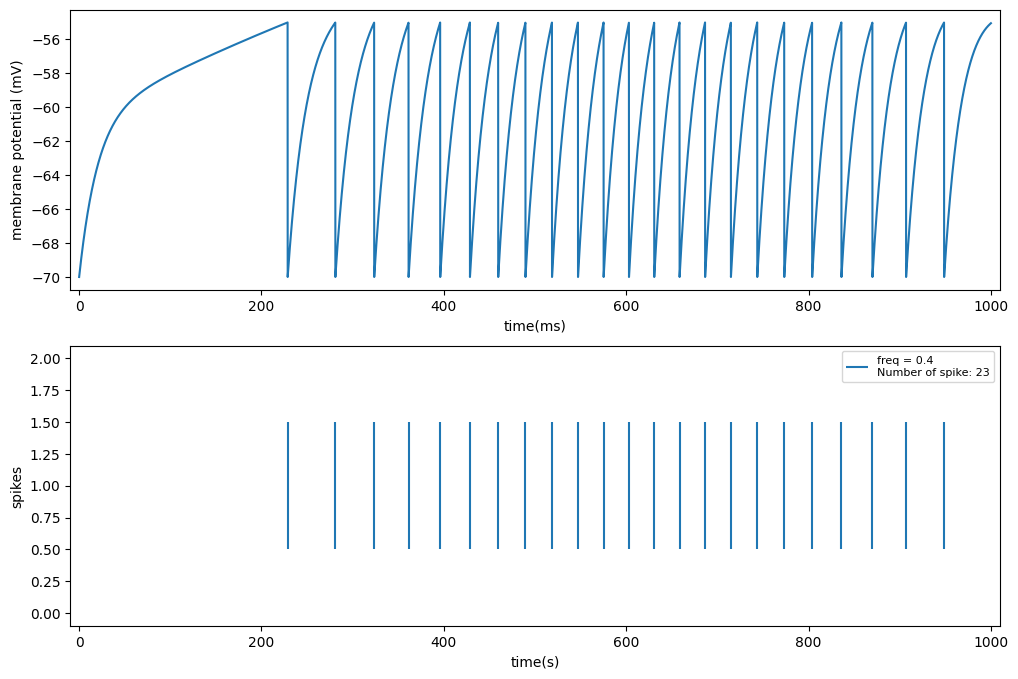

In [5]:
fig, ax = plt.subplots(2, 1, figsize=(12,8))

def Dfreq(frequency):
  ax[0].clear()
  ax[1].clear()
  input_signal = np.sin(2 * np.pi * frequency * np.arange(0, t_sim, dt) / 1000) * 10 + 10

  # Initialize neuron variables
  voltage = []  # Membrane potential
  spike_times = []  # List to store spike times

  # Simulate the encoding process
  # =======================================================

  voltage.append(v_rest)

  for i in range(1,num_steps):
    dv = (v_rest - voltage[i-1] + input_signal[i-1])/tau_m
    voltage.append(voltage[i-1] + dt * dv)

    if voltage[i] >= v_threshold:
      spike_times.append(i * dt)
      voltage[i] = v_rest


  # =======================================================

  # Plot the membrane potential and spike times
  # =======================================================

  time = np.linspace(0, t_sim, num_steps)
  ax[0].plot(time, voltage)
  ax[0].set_ylabel('membrane potential (mV)')
  ax[0].set_xlabel('time(ms)')
  ax[0].set_xlim((-10,t_sim+10))
  #ax[0].set_ylim((0,2))

  ax[1].eventplot(spike_times, label = f'freq = {frequency} \nNumber of spike: {len(spike_times)}')


  ax[1].set_ylabel('spikes')
  ax[1].set_xlabel('time(s)')
  ax[1].set_xlim((-10,t_sim+10))
  #ax[1].set_ylim((0,1))
  #plt.setp(ax[:2], xlim=((-10,t_sim+10)))

  ax[1].legend(fontsize=8)
  return ax

Dfreq(0.4)

In [6]:
# Create a list of values for initial current
freq = np.linspace(0,2,20)
# Create an animation
anim = FuncAnimation(fig, Dfreq, frames=freq, interval=150)

video = anim.to_html5_video()
html = display.HTML(video)
display.display(html)
plt.close()

# Question 2

## Briefing

<font face = "Tahoma" size = 4>
    We discussed that a neuron can encode sensory input into its firing rate. Assuming that the LIF neuron is a sufficient enough model to replicate the behavior of a real neuron, we want to plot the neurons firing rate versus the input signal frequency!
</font>

## Implementation (20 Points)

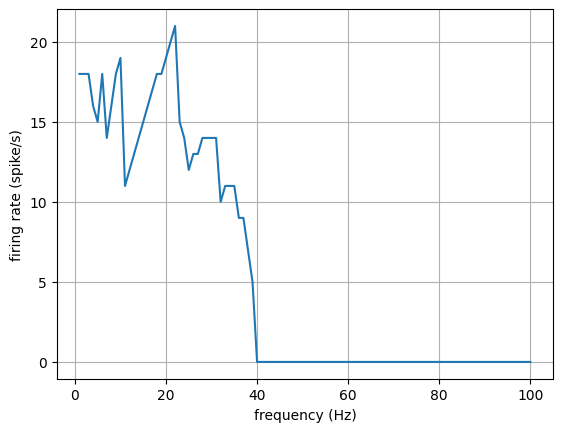

In [7]:
# Parameters for the Leaky Integrate-and-Fire (LIF) neuron model
tau_m = 20  # Membrane time constant (ms)
v_rest = -70  # Resting membrane potential (mV)
v_threshold = -58 # Spike threshold (mV)

# Simulation time
dt = 0.1  # Time step (ms)
t_sim = 1000  # Total simulation time (ms)
num_steps = int(t_sim / dt)

# List to store firing rates for different input frequencies
firing_rates = []

# Range of input frequencies to test
input_frequencies = np.arange(1, 101, 1)  # From 1 Hz to 100 Hz

for frequency in input_frequencies:
    # Simulated sensory input signal (sine wave with varying frequency)
    input_signal = np.sin(2 * np.pi * frequency * np.arange(0, t_sim, dt) / 1000) * 10 + 10

    # Initialize neuron variables
    voltage = []
    spike_times = []  # List to store spike times

    # Simulate the encoding process
    # =======================================================
    voltage.append(v_rest)

    for i in range(1,num_steps):
      dv = (v_rest - voltage[i-1] + input_signal[i-1])/tau_m
      voltage.append(voltage[i-1] + dt * dv)

      if voltage[i] >= v_threshold:
        spike_times.append(i * dt)
        voltage[i] = v_rest
    # =======================================================

    # Calculate the firing rate (spikes per second)
    # =======================================================
    firing_rates.append(len(spike_times) / (t_sim/1000)) ## ms to s
    # =======================================================

# Plot firing rate vs. input frequency
# =======================================================

plt.plot(input_frequencies, firing_rates)
plt.xlabel('frequency (Hz)')
plt.ylabel('firing rate (spike/s)')
plt.grid(True)
# =======================================================

## Another Question! (10 Points)

<font face = "Tahoma" size = 4>
<b>Manipulate the neuron's threshold value. Can you provide a physical explanation as to why different neurons have different optimum receptive fields?</b>
</font>

<font face = "Tahoma" size = 4>

ans: By increasing the threshold value, the firing rate must decrease. By difference in optimum receptive fields of different nuerons, neurons can have wide range of sensitivity. For example, neurons with smaller receptive fields can detect fine details, while those with larger fields can be more effective for detecting broader patterns or movements or neurons that detect edges have small and narrow receptive fields that can detect fine details, while neurons that detect motion have large and wide receptive fields. By having different receptive fields, neurons can encode and process different types of information and form a diverse representation of the sensitivity.


</font>

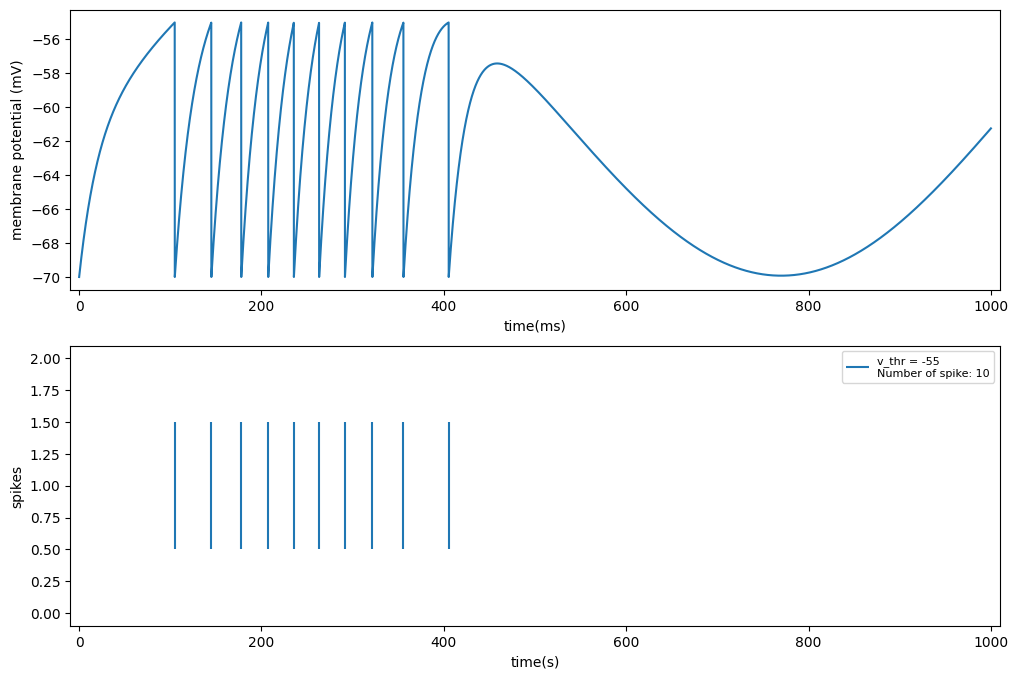

array([<Axes: xlabel='time(ms)', ylabel='membrane potential (mV)'>,
       <Axes: xlabel='time(s)', ylabel='spikes'>], dtype=object)

In [8]:
fig, ax = plt.subplots(2, 1, figsize=(12,8))

def Dthr(v_threshold):
  ax[0].clear()
  ax[1].clear()

  # Parameters for the Leaky Integrate-and-Fire (LIF) neuron model
  tau_m = 20  # Membrane time constant (ms)
  v_rest = -70  # Resting membrane potential (mV)

  # Simulation time
  dt = 0.1  # Time step (ms)
  t_sim = 1000  # Total simulation time (ms)
  num_steps = int(t_sim / dt)

  # Simulated sensory input signal
  frequency = 1
  input_signal = np.sin(2 * np.pi * frequency * np.arange(0, t_sim, dt) / 1000) * 10 + 10

  # Initialize neuron variables
  voltage = []  # Membrane potential
  spike_times = []  # List to store spike times

  # Simulate the encoding process
  # =======================================================

  voltage.append(v_rest)


  for i in range(1,num_steps):
    dv = (v_rest - voltage[i-1] + input_signal[i-1])/tau_m
    voltage.append(voltage[i-1] + dt * dv)

    if voltage[i] >= v_threshold:
      spike_times.append(i * dt)
      voltage[i] = v_rest


  # =======================================================
  # Plot the membrane potential and spike times
  # =======================================================
  time = np.linspace(0, t_sim, num_steps)
  ax[0].plot(time, voltage)
  ax[0].set_ylabel('membrane potential (mV)')
  ax[0].set_xlabel('time(ms)')
  ax[0].set_xlim((-10,t_sim+10))
  #ax[0].set_ylim((0,2))

  ax[1].eventplot(spike_times, label = f'v_thr = {v_threshold} \nNumber of spike: {len(spike_times)}')

  ax[1].set_ylabel('spikes')
  ax[1].set_xlabel('time(s)')
  ax[1].set_xlim((-10,t_sim+10))
  #ax[1].set_ylim((0,1))
  #plt.setp(ax[:2], xlim=((-10,t_sim+10)))

  ax[1].legend(fontsize=8)

  plt.show()
  # =======================================================
  return ax

Dthr(v_threshold= -55)

In [9]:
# Create a list of values for initial current
v_thr = np.linspace(-60,-40,21)
# Create an animation
anim = FuncAnimation(fig, Dthr, frames=v_thr, interval=150)

video = anim.to_html5_video()
html = display.HTML(video)
display.display(html)
plt.close()